# Pedestrian Forecasting
***

## Preparation

We start by installing the packages we need.

Import packages.

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

## Data preparation
This dataset contains hourly pedestrian counts since 2009 from pedestrian sensor devices located across the city of Melbourne, Australia. The data is updated on a monthly basis and can be used to determine variations in pedestrian activity throughout the day. https://data.melbourne.vic.gov.au/Transport/Pedestrian-Counting-System-Monthly-counts-per-hour/b2ak-trbp

In [ ]:
# Read
df = pd.read_csv('data/Pedestrian_Counting_System_-_Monthly__counts_per_hour_.csv', usecols=['Date_Time', 'Sensor_Name', 'Hourly_Counts'])

df.head()

In [ ]:
# Convert date to datetime
df['Date_Time'] = pd.to_datetime(df['Date_Time'])

# Group all sensors
df_grouped = df.groupby(['Date_Time']).agg({'Hourly_Counts': 'sum'}).rename(columns={'Hourly_Counts': 'Count_Pedestrians'})

# Aggregate weekly
df_weekly = df_grouped.resample('W').sum()

# Filter from the start of 2010 to end of 2019
df_weekly = df_weekly['2010-01-01': '2019-12-31']

In [ ]:
df_weekly

In [ ]:
y = df_weekly.squeeze() # prepare the data as a pandas Series

In [ ]:
df

## Exploratory Data Analysis

We now plot our weekly data.

In [ ]:
df_weekly.plot(figsize=(12,6), title='Count of pedestrians in Melbourne', xlabel='Date', ylabel='Count pedestrians')
plt.show()

We now aggregate our weekly data to monthly and plot.

In [ ]:
df_weekly.resample('M').sum().plot(figsize=(12,6), title='Count of pedestrians in Melbourne', xlabel='Date', ylabel='Count pedestrians')
plt.show()

We also check if our data is stationary.

In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df_weekly.values.flatten())

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

In [ ]:
import numpy as np
import pandas as pd

# Define the parameters of the sine wave
frequency = 0.2 # cycles per day
amplitude = 0.3 # peak value
phase = 0 # initial angle
offset = 1 # vertical shift

# Define the time range and interval
start_time = "2022-01-01 00:00:00" # start date and time
# end_time = "2023-01-01 00:00:00" # start date and time
end_time = "2022-02-01 23:00:00" # end date and time
time_interval = "1H" # hourly interval

# Create a time index using pandas date_range function
time_index = pd.date_range(start_time, end_time, freq=time_interval)

# Convert the time index to radians using numpy pi and timedelta function
time_radians = 2 * np.pi * frequency * (time_index - time_index[0]) / pd.Timedelta(days=1) + phase

# Calculate the sine values using numpy sin function and the parameters
sine_values = amplitude * np.sin(time_radians) + offset

# Create a dataframe using pandas DataFrame function and the time index and sine values
df = pd.DataFrame({"Time": time_index, "SMA": sine_values})

# Set the Time column as the index column using pandas set_index function
df = df.set_index("Time")

df['SMA'].plot()


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import talib

real_df = pd.read_table('/projects/genomic-ml/da2343/ml_project_2/robust_algo_trader/data/EURUSD_H1_200702210000_202304242100.tsv')
# real_df = pd.read_table('/Users/newuser/Projects/robust-algo-trader/data/EURUSD_H1_202302010000_202304242100.tsv')

df = real_df.copy()
# take only last 7000 rows
# df = df.iloc[:1_000]
df = df.iloc[-7_00:]

# remove the following columns <TICKVOL>, <VOL> and <SPREAD>
df = df.drop(['<TICKVOL>', '<VOL>', '<SPREAD>'], axis=1)
# rename the columns
df = df.rename(columns={'<DATE>': 'Date', 
                                '<TIME>': 'Time', 
                                '<OPEN>': 'Open', 
                                '<HIGH>': 'High', 
                                '<LOW>': 'Low', 
                                '<CLOSE>': 'Close'
                                })
# combine the date and time columns
df['Date_Time'] = df['Date'] + ' ' + df['Time']
# convert the date_time column to datetime
df['Date_Time'] = pd.to_datetime(df['Date_Time'], format='%Y%m%d %H:%M:%S.%f')
# remove the date and time columns
df = df.drop(['Date', 'Time'], axis=1)
# Rename Date_Time to Time
df = df.rename(columns={'Date_Time': 'Time'})
df.index = df['Time']
# df.set_index("Time")
# remove the Time column
df = df.drop(['Time'], axis=1)


prices = df["Close"].values
df["SMA"] = talib.SMA(prices, timeperiod=200)
df["EMA"] = talib.EMA(prices, timeperiod=200)
# df['TEMA'] = talib.TRIMA(prices, timeperiod=200*2)

df['ATR'] = talib.NATR(df['High'], df['Low'], df['Close'], timeperiod=200)
# df["EMA"] = ema
df = df.dropna()
df = df[['SMA']]

In [7]:
df

,SMA
Time,
2023-03-27 02:00:00,1.072596
2023-03-27 03:00:00,1.072615
2023-03-27 04:00:00,1.072638
2023-03-27 05:00:00,1.072656
2023-03-27 06:00:00,1.072671
...,...
2023-04-24 17:00:00,1.098075
2023-04-24 18:00:00,1.098125
2023-04-24 19:00:00,1.098180


In [2]:
df = df[['SMA']]
# time_index = pd.date_range(df.index[0], df.index[-1], freq='1H')
# first 500 rows
# time_index = time_index[:500]
# df = pd.DataFrame({"Time": time_index, "SMA": df['SMA'].values})
# df
# df = df.set_index("Time")

In [5]:
df

,Time,SMA
0,2023-03-27 02:00:00,1.072596
1,2023-03-27 03:00:00,1.072615
2,2023-03-27 04:00:00,1.072638
3,2023-03-27 05:00:00,1.072656
4,2023-03-27 06:00:00,1.072671
...,...,...
495,2023-04-16 17:00:00,1.098075
496,2023-04-16 18:00:00,1.098125
497,2023-04-16 19:00:00,1.098180
498,2023-04-16 20:00:00,1.098238


(<Figure size 1600x400 with 1 Axes>, <Axes: >)

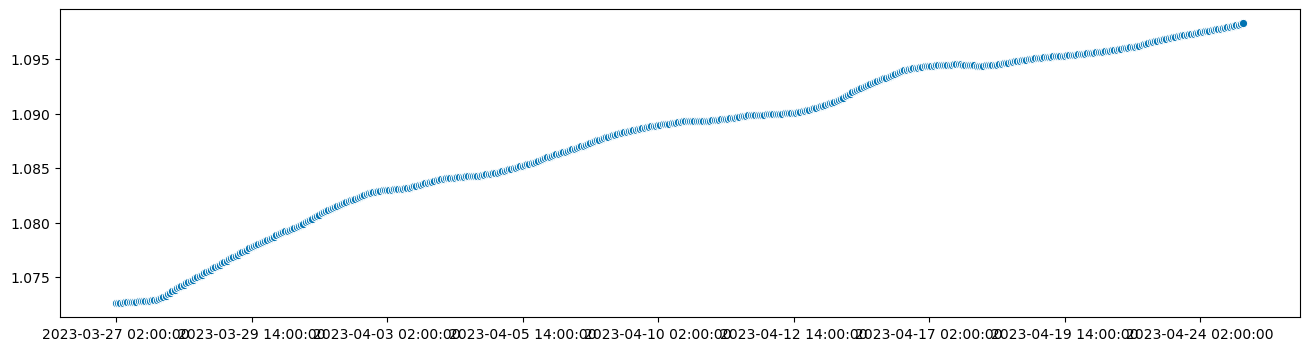

In [8]:
from sktime.utils.plotting import plot_series
plot_series(df)

## Forecasting

### Multiple Linear Regression

In [9]:
from sktime.forecasting.model_selection import temporal_train_test_split
y = df
y_train, y_test = temporal_train_test_split(y, test_size=30) # Predict from 1st July 2019

(<Figure size 1600x400 with 1 Axes>, <Axes: >)

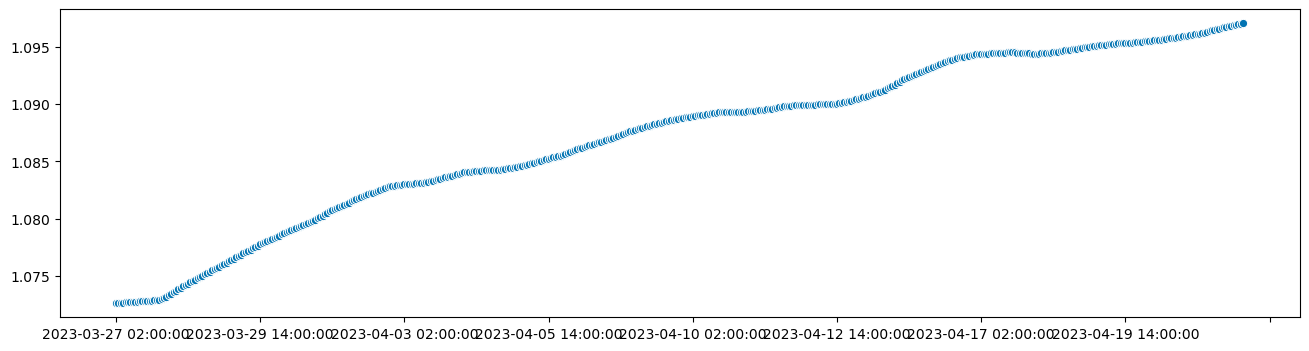

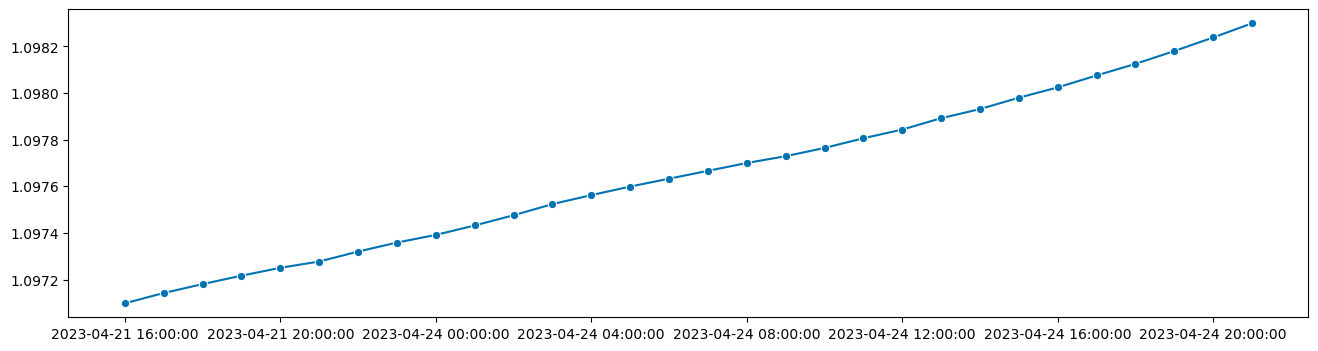

In [12]:
plot_series(y_train)
plot_series(y_test)


In [ ]:
y = y.fillna(method='ffill')
y

In [ ]:
y_test.index

In [ ]:
from sktime.forecasting.base import ForecastingHorizon

fh = ForecastingHorizon(y_test.index, is_relative=False, freq='BH' )

from sklearn.linear_model import LinearRegression
from sktime.forecasting.compose import make_reduction

regressor = LinearRegression()
forecaster = make_reduction(regressor, window_length=20, strategy="recursive")

forecaster.fit(y_train)

y_pred = forecaster.predict(fh)

In [ ]:
fh

In [ ]:
from sktime.utils.plotting import plot_series


plot_series(y_train['2007-04-16 11:00:00':], y_test, y_pred, labels=["y_train", "y_test", "y_pred"], x_label='Date', y_label='Count pedestrians')

In [ ]:
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error

print('MAPE: %.4f' % mean_absolute_percentage_error(y_test, y_pred, symmetric=False))

In [16]:
from sktime.datasets import load_airline
from sktime.forecasting.trend import TrendForecaster
y = load_airline()
forecaster = TrendForecaster()
forecaster.fit(y)

y_pred = forecaster.predict(fh=[1,2,3])

In [17]:
y_pred

1961-01    472.944444
1961-02    475.601628
1961-03    478.258812
Freq: M, Name: Number of airline passengers, dtype: float64

### XGBoost with multiple inputs

In [ ]:
from xgboost import XGBRegressor

regressor = XGBRegressor(objective='reg:squarederror', random_state=42)
forecaster = make_reduction(regressor, window_length=52, strategy="recursive")

In [ ]:
# Create an exogenous dataframe indicating the month
X = pd.DataFrame({'month': y.index.month}, index=y.index)
X = pd.get_dummies(X.astype(str), drop_first=True)

# Split into train and test
X_train, X_test = temporal_train_test_split(X, test_size=26) # Predict from 1st July 2019

In [ ]:
# Fit
forecaster.fit(y=y_train, X=X_train)

# Predict
y_pred = forecaster.predict(fh=fh, X=X_test)

In [ ]:
plot_series(y_train['2018-07-01':], y_test, y_pred, labels=["y_train", "y_test", "y_pred"], x_label='Date', y_label='Count pedestrians');

In [ ]:
print('MAPE: %.4f' % mean_absolute_percentage_error(y_test, y_pred, symmetric=False))

### Tuning the hyperparameters of our forecaster
https://towardsdatascience.com/xgboost-fine-tune-and-optimize-your-model-23d996fab663

In [ ]:
from sktime.forecasting.model_selection import SingleWindowSplitter

validation_size = 26
cv = SingleWindowSplitter(window_length=len(y)-validation_size, fh=validation_size)

In [ ]:
from sktime.forecasting.model_selection import ForecastingRandomizedSearchCV

param_grid = {
    'estimator__max_depth': [3, 5, 6, 10, 15, 20],
    'estimator__learning_rate': [0.01, 0.1, 0.2, 0.3],
    'estimator__subsample': np.arange(0.5, 1.0, 0.1),
    'estimator__colsample_bytree': np.arange(0.4, 1.0, 0.1),
    'estimator__colsample_bylevel': np.arange(0.4, 1.0, 0.1),
    'estimator__n_estimators': [100, 500, 1000]
}

regressor = XGBRegressor(objective='reg:squarederror', random_state=42)
forecaster = make_reduction(regressor, window_length=52, strategy="recursive")

gscv = ForecastingRandomizedSearchCV(forecaster, cv=cv, param_distributions=param_grid, n_iter=100, random_state=42)

In [ ]:
# Fit
gscv.fit(y=y_train, X=X_train)

# Predict
y_pred = gscv.predict(fh=fh, X=X_test)

In [ ]:
gscv.cv_results_

In [ ]:
plot_series(y_train['2018-07-01':], y_test, y_pred, labels=["y_train", "y_test", "y_pred"], x_label='Date', y_label='Count pedestrians');

In [ ]:
print('MAPE: %.4f' % mean_absolute_percentage_error(y_test, y_pred, symmetric=False))

## Adding components to our forecasting pipeline

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
plt.rcParams["figure.figsize"] = (8,10)

result = seasonal_decompose(y_train, model='multiplicative')
result.plot()
plt.show()

In [ ]:
from sktime.forecasting.compose import TransformedTargetForecaster
from sktime.transformations.series.detrend import Deseasonalizer, Detrender
from sktime.forecasting.trend import PolynomialTrendForecaster

regressor = XGBRegressor(objective='reg:squarederror', random_state=42)

forecaster = TransformedTargetForecaster(
    [
        ("deseasonalize", Deseasonalizer(model="multiplicative", sp=52)),
        ("detrend", Detrender(forecaster=PolynomialTrendForecaster(degree=1))),
        ("forecast", make_reduction(regressor, window_length=52, strategy="recursive"),
        ),
    ]
)

In [ ]:
param_grid = {
    'deseasonalize__model': ['multiplicative', 'additive'],
    'detrend__forecaster__degree': [1, 2, 3],
    'forecast__estimator__max_depth': [3, 5, 6, 10, 15, 20],
    'forecast__estimator__learning_rate': [0.01, 0.1, 0.2, 0.3],
    'forecast__estimator__subsample': np.arange(0.5, 1.0, 0.1),
    'forecast__estimator__colsample_bytree': np.arange(0.4, 1.0, 0.1),
    'forecast__estimator__colsample_bylevel': np.arange(0.4, 1.0, 0.1),
    'forecast__estimator__n_estimators': [100, 500, 1000]
}

gscv = ForecastingRandomizedSearchCV(forecaster, cv=cv, param_distributions=param_grid, n_iter=100, random_state=42)

In [ ]:
# Fit
gscv.fit(y=y_train, X=X_train)

# Predict
y_pred = gscv.predict(fh=fh, X=X_test)

In [ ]:
gscv.cv_results_

In [ ]:
gscv.cv_results_.iloc[0, 3]

In [ ]:
plot_series(y_train['2018-07-01':], y_test, y_pred, labels=["y_train", "y_test", "y_pred"], x_label='Date', y_label='Count pedestrians');

In [ ]:
print('MAPE: %.4f' % mean_absolute_percentage_error(y_test, y_pred, symmetric=False))